# Реализация табличной Q-функции

Будем допускать, что Q-функция уже дана, и мы лишь учимся ей пользоваться для совершения оптимальных действий

In [1]:
import numpy as np
import gym

import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

# Создание игровой среды
Создадим эмулятор Frozen Lake.

In [2]:
env = gym.make('FrozenLake-v1', is_slippery=False, apply_api_compatibility=False)

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))

States: 16
Actions: 4


# Q-функция
Создадим Q-функцию. По сути, это просто двумерная таблица размерности [количество состояний, количество действий].
Пока что мы не знаем, как получить значения для Q-функции, так что заполняем всю таблицу случайными значениями (просто для демо).

In [3]:
Q = np.random.rand(NUM_STATES, NUM_ACTIONS)
print(Q)

[[0.03378614 0.88376013 0.96793519 0.29853257]
 [0.42241836 0.50260316 0.22076714 0.4197983 ]
 [0.7811618  0.53671345 0.71205824 0.71445105]
 [0.66724225 0.65832081 0.43404497 0.31346852]
 [0.48862519 0.97285707 0.85299735 0.45360338]
 [0.48096377 0.00671381 0.3057875  0.52317689]
 [0.08959486 0.03342428 0.10144946 0.44024624]
 [0.95780006 0.10807328 0.46683104 0.69298421]
 [0.18735799 0.70654446 0.96541301 0.2474001 ]
 [0.16377057 0.85618348 0.55227891 0.34328723]
 [0.4339869  0.74852589 0.2243195  0.56497422]
 [0.88541027 0.02317737 0.92569591 0.08935238]
 [0.40324657 0.16153134 0.42872417 0.57857045]
 [0.63017181 0.96155939 0.42118052 0.71569655]
 [0.47549097 0.86464253 0.18411456 0.77231173]
 [0.79236354 0.49204591 0.85740147 0.11194959]]


# Запуск симуляции
Запустим симуляция для FrozenLake так же, как мы делали ранее. Но только на этот раз мы будем использовать не случайную стратегию,
а стратегию, основанную на Q-функции.
Оптимальная политика (при условии оптимальности Q-функции) будет следующая: для текущего состояния s выбирать такое действие,
a, при котором значение Q(s, a) максимально.

a = np.argmax(Q[s, :])

In [4]:
s = env.reset()[0]

for _ in range(100):
    env.render()
    a = np.argmax(Q[s, :]) # выбираем оптимальной действие
    s, r, _, done = env.step(a)[:4]
    if done:
        env.render()
        print('Final reward = {}'.format(r))
        break
        
env.close()        

Final reward = 0


# Реализация табличного Q-Learning

## Параметры обучения
* lr - скорость обучения (в теории это был параметр $\alpha$)
* $\gamma$ - параметр дисконтирования
* NUM_EPISODES - сколько всего эпизодов игры булем осуществлять
* MAX_STEPS - максимальное количество шагов в рамках одного эпизода. Эпизод может закончиться и раньше. Это ограничение
нужно, если агент зашел в какой-то тупик и там застрял. Или для бесконечных игр/симуляций.

In [5]:
lr = .8 # learning rate
gamma = .95 # параметр дисконтирования

NUM_EPISODES = 50 # число эпизодов для обучения
MAX_STEPS = 100 # максимальное число шагов в эпизоде

# Обучение Q-функции

In [21]:
pathLenList = [] # длины траекторий по эпизодам
totalRewardList = [] # суммарные награды по эпизодам

# Инициализация Q-функции (таблицы)
Q = np.random.rand(NUM_STATES, NUM_ACTIONS)

for i in range(NUM_EPISODES):
    s = env.reset()[0]
    
    totalReward = 0
    step = 0
    
    while step < MAX_STEPS:
        step += 1
        
        # Выбор действия по текущей политике
        a = np.argmax(Q[s, :])
        
        # Сделать шаг
        s1, r, trunc, done = env.step(a)[:4]
        
#         done = min(trunc, done)
        
        # Новое (целевое) значение Q-функции
        if done:
            Q_target = r
        else:
            Q_target = r + gamma * np.max(Q[s1, :])
        
        # Обновление Q-функции
        Q[s, a] = (1 - lr) * Q[s, a] + lr * Q_target
        
        totalReward += r
        s = s1
        
        # Если конец эпизода
        if done:
            break
            
        pathLenList.append(step)
        totalRewardList.append(totalReward)
        print('Episode {}: Total reward = {}'.format(i, totalReward))
            

Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0:

In [18]:
Q

array([[1.36939463e-01, 7.73780937e-01, 1.38016813e-01, 1.37293683e-01],
       [1.35578595e-01, 1.34586311e-01, 1.43223604e-01, 1.44526930e-01],
       [1.45547678e-01, 5.66861946e-01, 1.05314820e-01, 1.34500667e-01],
       [1.55784052e-02, 1.59369276e-02, 5.82452684e-02, 5.61916433e-02],
       [1.41391229e-01, 8.14506250e-01, 3.10992789e-02, 1.46331646e-01],
       [1.20979365e-01, 3.57298969e-01, 5.64104866e-01, 7.65992719e-01],
       [1.08228457e-02, 8.53122347e-01, 6.70999987e-02, 1.50347186e-01],
       [1.77396036e-02, 8.79892590e-01, 8.10262708e-01, 5.73680408e-01],
       [1.51192306e-01, 2.22453261e-02, 8.57375000e-01, 1.50204236e-01],
       [1.52897910e-01, 1.60610015e-01, 9.02500000e-01, 5.06201331e-02],
       [1.53878144e-01, 9.50000000e-01, 1.30153954e-01, 1.63182405e-01],
       [8.28060850e-01, 6.06246260e-01, 4.96591236e-01, 8.69188715e-01],
       [8.95063767e-01, 5.46529581e-01, 9.44974133e-01, 7.82828123e-02],
       [1.69302920e-04, 1.61623935e-01, 7.67373882e

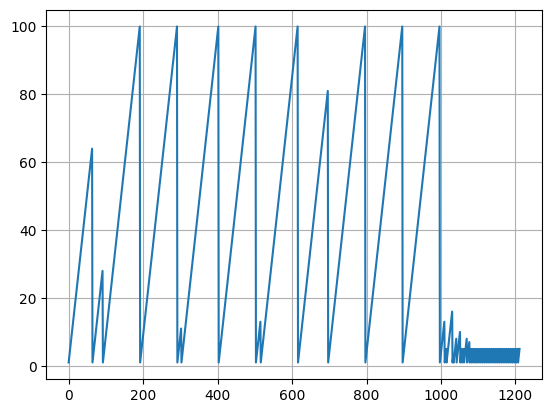

In [19]:
plt.plot(pathLenList)
plt.grid()

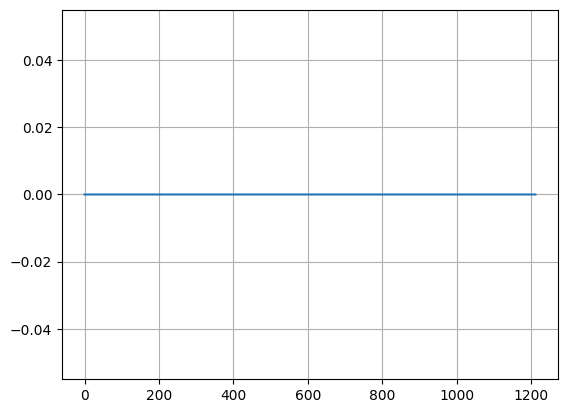

In [20]:
plt.plot(totalRewardList)
plt.grid()

In [14]:
totalReward = 0
s = env.reset()[0]

for _ in range(100):
    env.render()
    a = np.argmax(Q[s, :]) # выбираем оптимальное действие
    s, r, done, trunc = env.step(a)[:4]
    totalReward += r
    if done:
        env.render()
        break
        
env.close()
print('Total reward = {}'.format(totalReward))

Total reward = 1.0
